<a href="https://colab.research.google.com/github/Madhu678-coder/Assignment/blob/main/Data%2BAi_assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MADHUKUMAR CHILUKURI

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [4]:
X = np.array([
    [25, 50000, 80],
    [45, 100000, 20],
    [30, 60000, 90],
    [50, 120000, 10],
    [22, 48000, 85],
    [40, 80000, 30],
    [23, 51000, 75],
    [52, 110000, 15]
])

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
inertia = []
K_range = range(1, 9)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

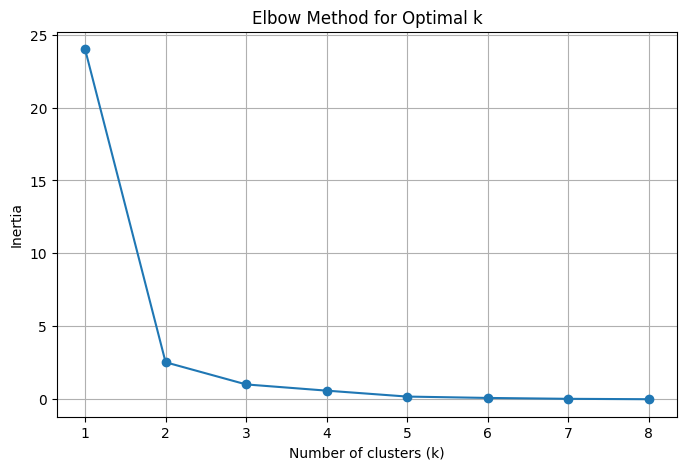

In [7]:
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

In [8]:
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

In [9]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
centroids_pca = pca.transform(kmeans.cluster_centers_)

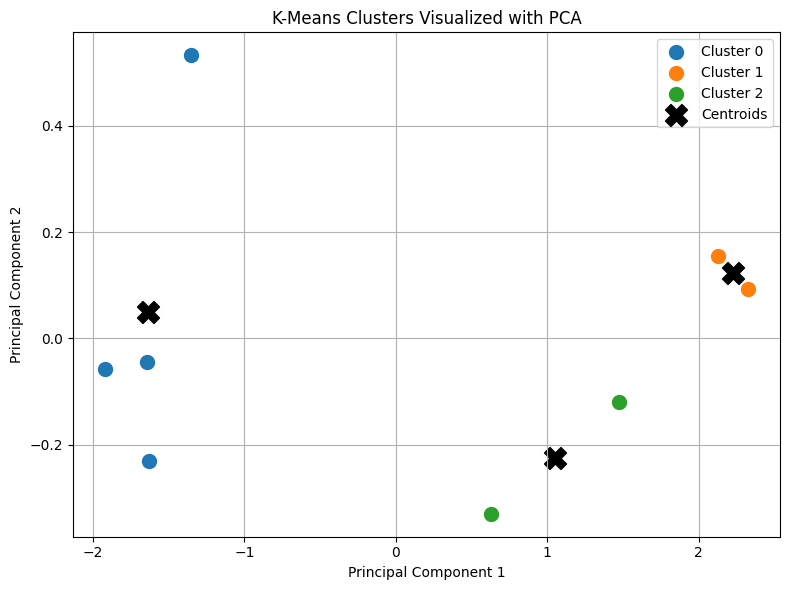

In [10]:
plt.figure(figsize=(8, 6))
for i in range(k_optimal):
    plt.scatter(X_pca[cluster_labels == i, 0],
                X_pca[cluster_labels == i, 1],
                label=f"Cluster {i}", s=100)

plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
            c='black', s=250, marker='X', label='Centroids')

plt.title("K-Means Clusters Visualized with PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
sil_score = silhouette_score(X_scaled, cluster_labels)
print("Silhouette Score:", sil_score)

Silhouette Score: 0.610515771746061
